<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [15]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [18]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [22]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display first few duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())


Number of duplicate rows: 0
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWo

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [23]:
# Check missing values across all columns
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Choose 'EdLevel' and fill missing values with the most frequent (mode)
if 'EdLevel' in df.columns:
    most_frequent_ed = df['EdLevel'].mode()[0]
    df['EdLevel'] = df['EdLevel'].fillna(most_frequent_ed)
    print(f"Missing values in 'EdLevel' filled with most frequent value: {most_frequent_ed}")


Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
Missing values in 'EdLevel' filled with most frequent value: Bachelor’s degree (B.A., B.S., B.Eng., etc.)


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



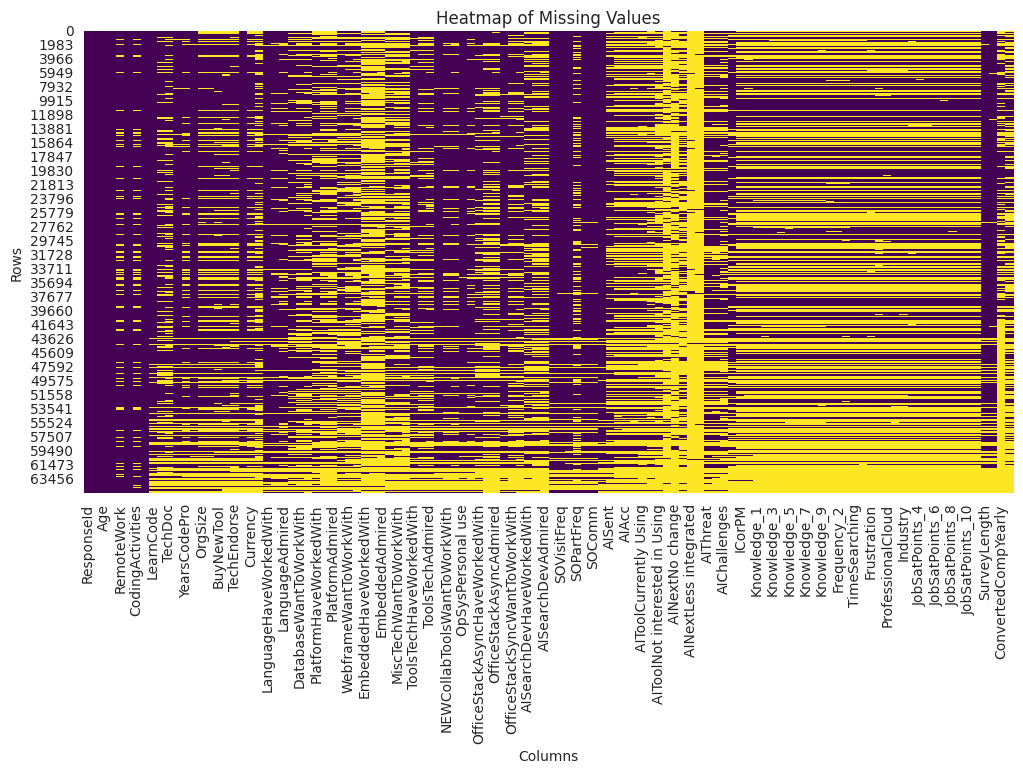

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12,6))

# Create heatmap of missing values
sns.heatmap(df.isnull(), 
            cbar=False,      # Hide the color bar
            cmap="viridis")  # Color map

# Add a title
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [27]:
# Count missing values in 'Employment' column
missing_employment = df['Employment'].isnull().sum()
print(f"Number of missing rows in 'Employment': {missing_employment}")


Number of missing rows in 'Employment': 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [28]:
# Identify the most frequent value in 'Employment'
most_frequent_employment = df['Employment'].mode()[0]
print(f"The most frequent value in 'Employment' is: {most_frequent_employment}")


The most frequent value in 'Employment' is: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [29]:
# Impute missing values in 'Employment' with the most frequent value
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Verify that there are no missing values left in the column
missing_after = df['Employment'].isnull().sum()
print(f"Number of missing values in 'Employment' after imputation: {missing_after}")


Number of missing values in 'Employment' after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_832/2997500855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette="pastel")


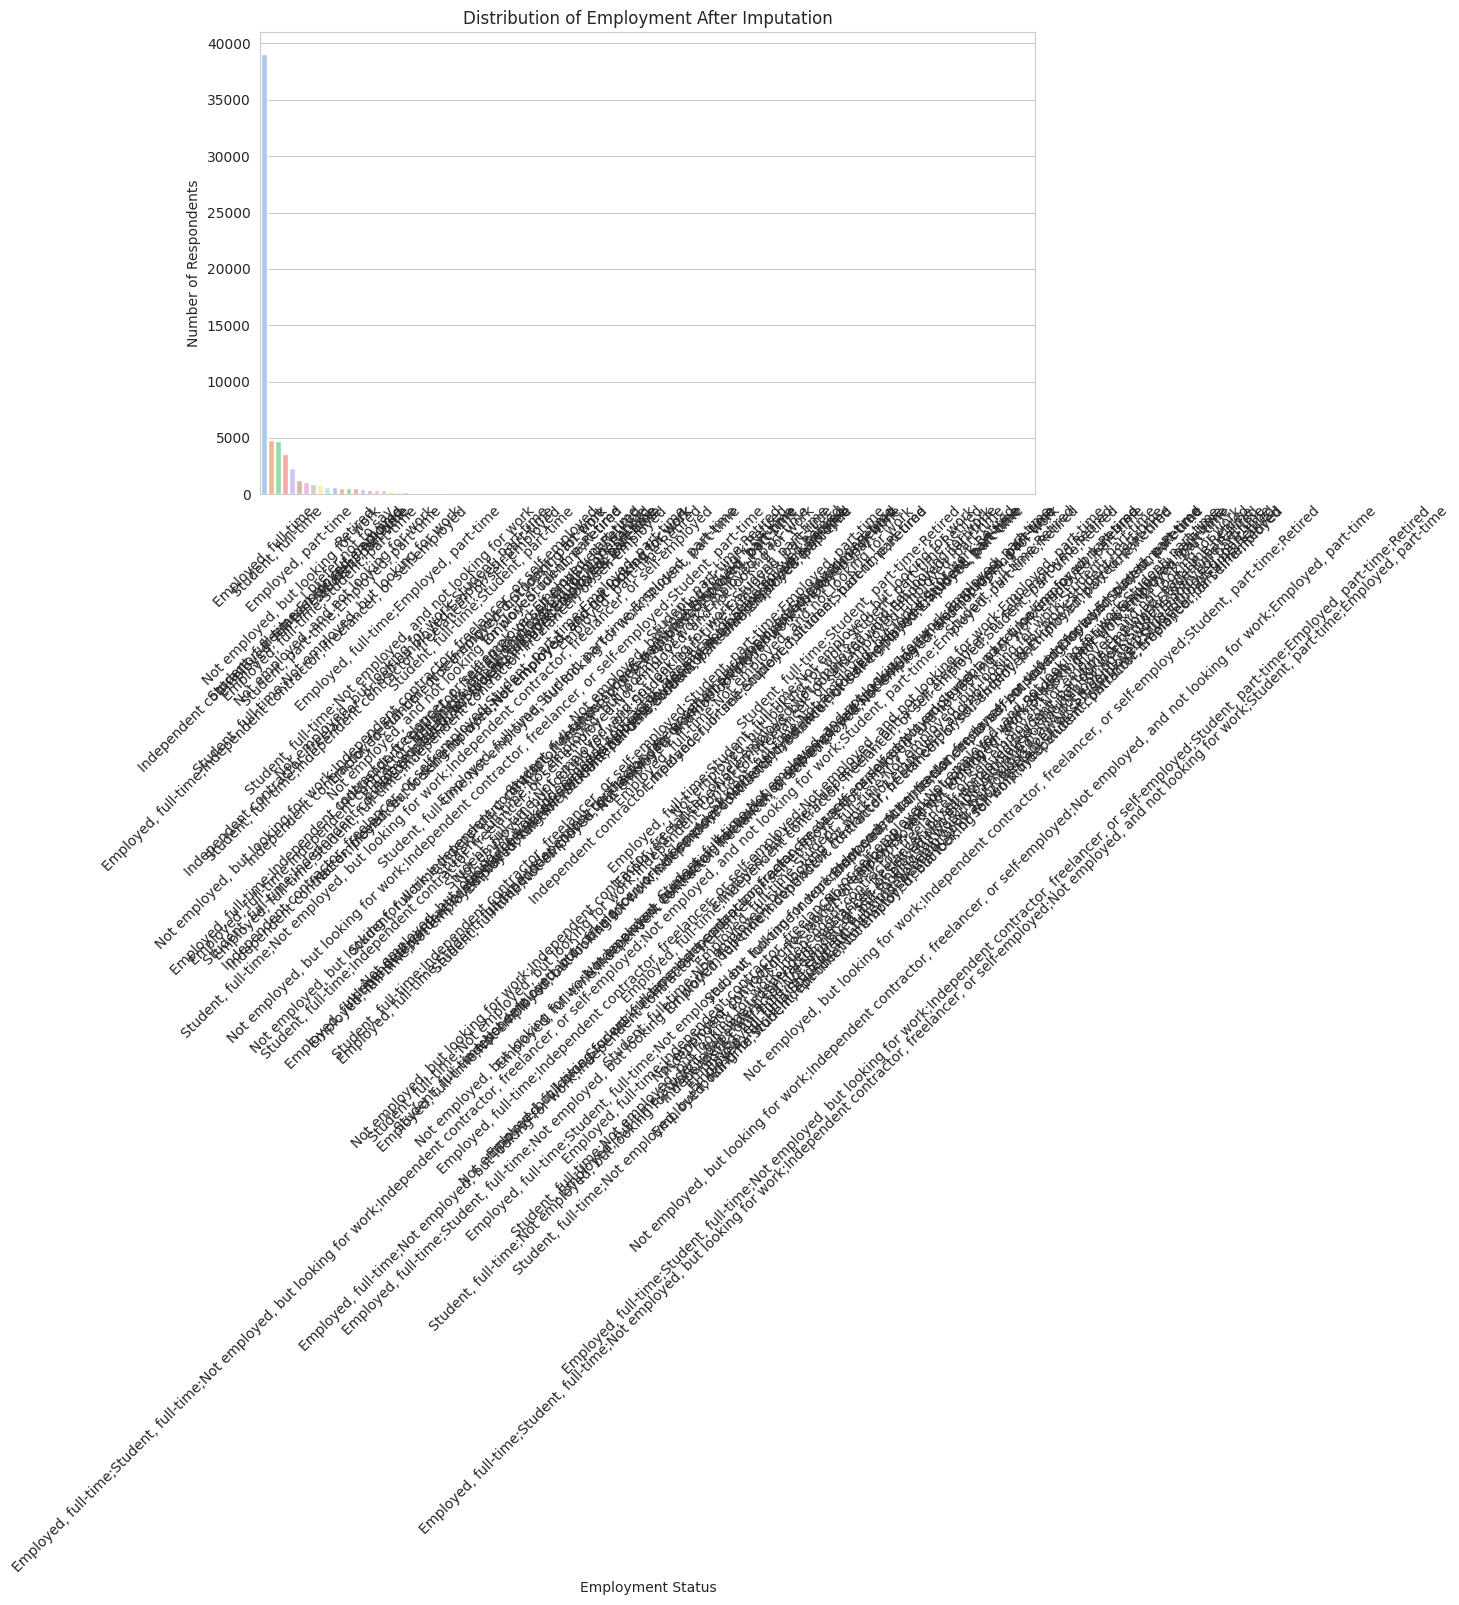

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10,6))

# Plot the distribution of Employment
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette="pastel")

# Add title and labels
plt.title("Distribution of Employment After Imputation")
plt.xlabel("Employment Status")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
